<p style="font-family:Verdana; font-size: 26px; color: magenta"> 4.2 - House Price Prediction using Machine Learning </p>

<p style="font-family:Verdana; font-size: 18px; color: darkorange">  By using machine learning algorithms we can predict the price of a house based on various features</p> 
<p style="font-family:Verdana; font-size: 18px; color: magenta"> 1. Such as location, size, number of bedrooms and other relevant factors
</p>

<p style="font-family:Verdana; font-size: 18px; color: orange"> Step 1: Import Libraries</p>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 2: Loading the Data</p>

In [5]:
# Ihe dataset contains 284,807 transactions with 31 features including:
df = pd.read_excel('../../data/HousePricePrediction.xlsx')
 
df.head(3)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0


In [6]:
df.shape

(2919, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1459.000000,842.787043,0.0,729.5,1459.0,2188.5,2918.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0
TotalBsmtSF,2918.0,1051.777587,440.766258,0.0,793.0,989.5,1302.0,6110.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 3: Data Preprocessing</p>

In [11]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 4: Exploratory Data Analysis</p>

In [13]:
# EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. 

<Axes: >

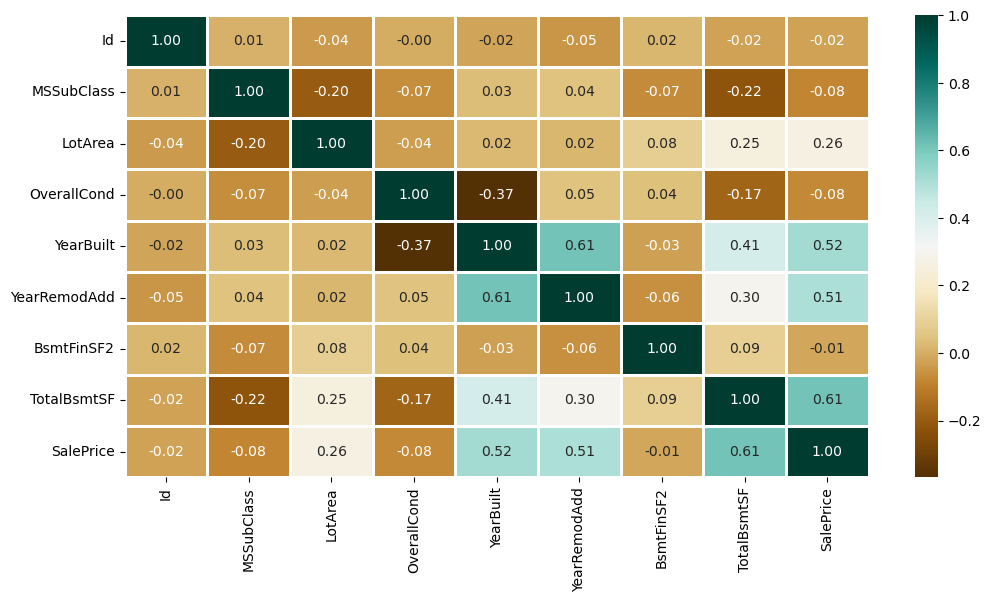

In [14]:
numerical_dataset = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [15]:
# To analyze the different categorical features. Let's draw the barplot.

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

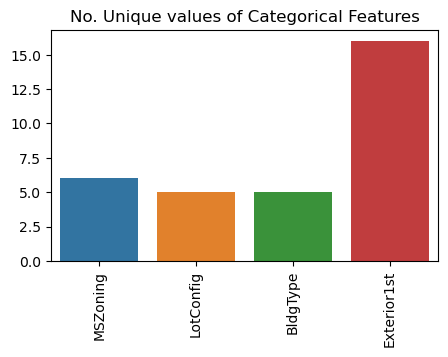

In [30]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(5,3))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
 
sns.barplot(x=object_cols,y=unique_values, palette='tab10', hue=object_cols)

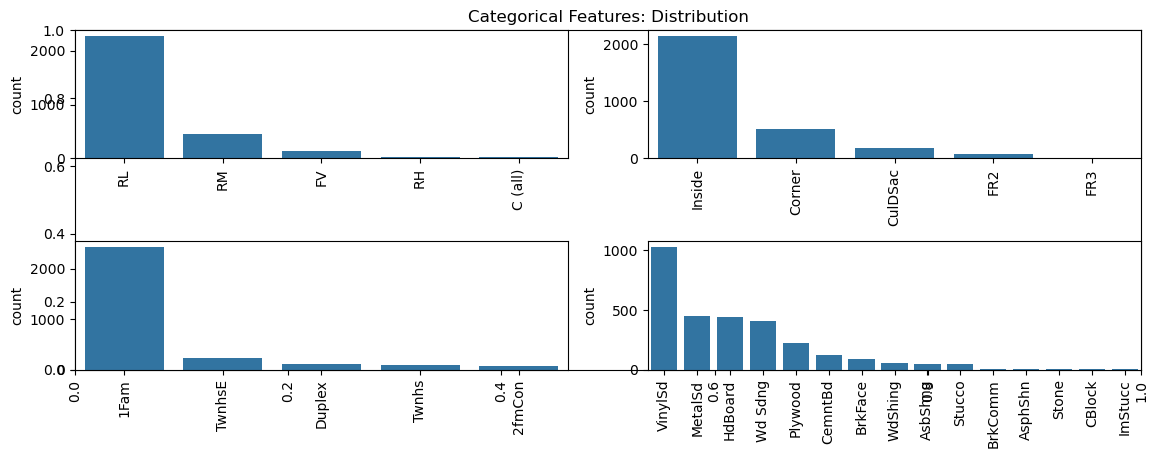

In [37]:
plt.figure(figsize=(12, 5))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
 
 
for i, col in enumerate(object_cols):
    y = df[col].value_counts()
    plt.subplot(2, 2, i+1)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)

plt.tight_layout()
plt.show()

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 5: Data Cleaning</p>

In [38]:
# Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data. 

# As in our dataset there are some columns that are not important and irrelevant for the model training.

In [39]:
# As Id Column will not be participating in any prediction. So we can Drop it.
df.drop(['Id'],
             axis=1,
             inplace=True)

In [40]:
# To check the null values in the dataset.
for col in df.columns:
    temp = df[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contains {temp} null values.')

Column MSZoning contains 4 null values.
Column Exterior1st contains 1 null values.
Column BsmtFinSF2 contains 1 null values.
Column TotalBsmtSF contains 1 null values.
Column SalePrice contains 1459 null values.


In [41]:
# Replacing SalePrice empty values with their mean values to make the data distribution symmetric.
df['SalePrice'] = df['SalePrice'].fillna(
  df['SalePrice'].mean()) 

In [43]:
new_dataset = df.dropna()

In [44]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 6: OneHotEncoder - For Label categorical features</p>

In [45]:
# One hot Encoding is the best way to convert categorical data into binary vectors.
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [46]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 7: Splitting Dataset into Training and Testing</p>

In [ ]:
# X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 8: Model Training and Accuracy</p>

<p style="font-family:Verdana; font-size: 18px; color: olive"> 1. SVM - Support vector Machine</p>

In [48]:
# Support vector Machine is a supervised machine learning algorithm primarily 
# used for classification tasks though it can also be used for regression. 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


<p style="font-family:Verdana; font-size: 18px; color: olive"> 2. Random Forest Regression</p>

In [49]:
# Random Forest is an ensemble learning algorithm used for both classification and regression tasks. 
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)
 

0.19799466087755305

<p style="font-family:Verdana; font-size: 18px; color: olive"> 3. Linear Regression</p>

In [51]:
# Linear Regression is a statistical method used for modeling the relationship 
# between a dependent variable and one or more independent variables.
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1874168384160009


<p style="font-family:Verdana; font-size: 18px; color: orange"> Clearly SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx.</p>